In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
import joblib

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Data/AI ML Internship Training Data.xlsx - freight_delivery_realistic_data.csv")
df.head()

,Shipment ID,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,SHIP000000,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,SHIP000001,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,SHIP000002,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,SHIP000003,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,SHIP000004,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes


### Understanding the data

In [ ]:
df.drop('Shipment ID', axis=1, inplace=True) # No use

In [ ]:
print(f"The shape of the dataframe is {df.shape}")

The shape of the dataframe is (20000, 10)


In [ ]:
print("Info of the dataset:")
df.info()

Info of the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Origin                 20000 non-null  object
 1   Destination            20000 non-null  object
 2   Shipment Date          20000 non-null  object
 3   Planned Delivery Date  20000 non-null  object
 4   Actual Delivery Date   20000 non-null  object
 5   Vehicle Type           19403 non-null  object
 6   Distance (km)          20000 non-null  int64 
 7   Weather Conditions     20000 non-null  object
 8   Traffic Conditions     20000 non-null  object
 9   Delayed                20000 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.5+ MB


In [ ]:
print("Description of the dataset:")
df.describe()

Description of the dataset:


,Distance (km)
count,20000.000000
mean,1101.663750
std,520.717873
min,200.000000
25%,649.750000
50%,1102.000000
75%,1551.000000
max,2000.000000


In [ ]:
print("Null values in the dataset:")
df.isnull().sum()

Null values in the dataset:


,0
Origin,0
Destination,0
Shipment Date,0
Planned Delivery Date,0
Actual Delivery Date,0
Vehicle Type,597
Distance (km),0
Weather Conditions,0
Traffic Conditions,0
Delayed,0


In [ ]:
print(f"Number of duplicate values in the dataset: {df.duplicated().sum()}")

Number of duplicate values in the dataset: 0


In [ ]:
# Handling the missing, imputing with the mode of the categories of column
df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0], inplace=True)

<ipython-input-10-46d13bcef01e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Vehicle Type'].fillna(df['Vehicle Type'].mode()[0], inplace=True)


In [ ]:
categoical_columns = df.select_dtypes(include='object').columns
categoical_columns

Index(['Origin', 'Destination', 'Shipment Date', 'Planned Delivery Date',
       'Actual Delivery Date', 'Vehicle Type', 'Weather Conditions',
       'Traffic Conditions', 'Delayed'],
      dtype='object')

In [ ]:
df

,Origin,Destination,Shipment Date,Planned Delivery Date,Actual Delivery Date,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed
0,Jaipur,Mumbai,2023-04-26,2023-05-01,2023-05-02,Trailer,1603,Rain,Light,Yes
1,Bangalore,Delhi,2023-02-09,2023-02-13,2023-02-17,Trailer,1237,Storm,Moderate,Yes
2,Mumbai,Chennai,2023-09-19,2023-09-25,2023-09-25,Truck,1863,Clear,Light,No
3,Hyderabad,Ahmedabad,2023-04-01,2023-04-05,2023-04-05,Container,1374,Clear,Light,No
4,Chennai,Kolkata,2023-11-24,2023-11-26,2023-11-28,Container,676,Clear,Heavy,Yes
...,...,...,...,...,...,...,...,...,...,...
19995,Chennai,Bangalore,2023-06-22,2023-06-23,2023-06-26,Truck,564,Fog,Moderate,Yes
19996,Hyderabad,Jaipur,2023-03-02,2023-03-03,2023-03-07,Truck,305,Storm,Moderate,Yes
19997,Hyderabad,Mumbai,2023-05-24,2023-05-27,2023-06-02,Trailer,1028,Rain,Moderate,Yes
19998,Ahmedabad,Chennai,2023-05-02,2023-05-05,2023-05-08,Lorry,905,Fog,Moderate,Yes


In [ ]:
def visualize_numeric(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    for col in numeric_cols.columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f'Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        plt.show()

In [ ]:
def relationship_analysis(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    if not numeric_cols.empty:
        plt.figure(figsize=(10, 6))
        sns.heatmap(numeric_cols.corr(), annot=True, cmap='coolwarm')
        plt.title('Correlation Heatmap')
        plt.show()

    if len(numeric_cols.columns) > 1:
        sns.pairplot(numeric_cols)
        plt.show()

In [ ]:
def analyze_categorical(df):
    categorical_cols = df.select_dtypes(exclude=[np.number])
    for col in categorical_cols.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')
        plt.title(f'Distribution of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()


In [ ]:
def delay_analysis(df):
    if 'Delayed' in df.columns:
        plt.figure(figsize=(8, 4))
        sns.countplot(x='Delayed', data=df, palette='coolwarm')
        plt.title('Delayed Shipments')
        plt.xlabel('Delayed')
        plt.ylabel('Count')
        plt.show()

In [ ]:
def process_dates(df):
    try:
        df['Shipment Date'] = pd.to_datetime(df['Shipment Date'], errors='coerce')
        df['Planned Delivery Date'] = pd.to_datetime(df['Planned Delivery Date'], errors='coerce')
        df['Actual Delivery Date'] = pd.to_datetime(df['Actual Delivery Date'], errors='coerce')
        df['Planned Delay (days)'] = (df['Planned Delivery Date'] - df['Shipment Date']).dt.days
        df['Actual Delay (days)'] = (df['Actual Delivery Date'] - df['Shipment Date']).dt.days
    except Exception as e:
        print(f"Error processing dates: {e}")

In [ ]:
def perform_eda(df):
    process_dates(df)
    visualize_numeric(df)
    analyze_categorical(df)
    relationship_analysis(df)
    delay_analysis(df)

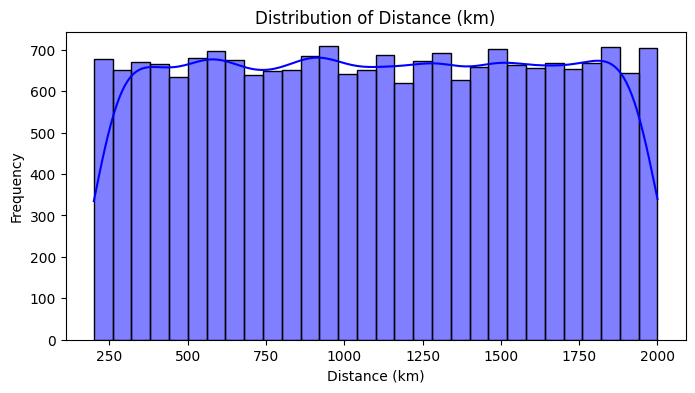

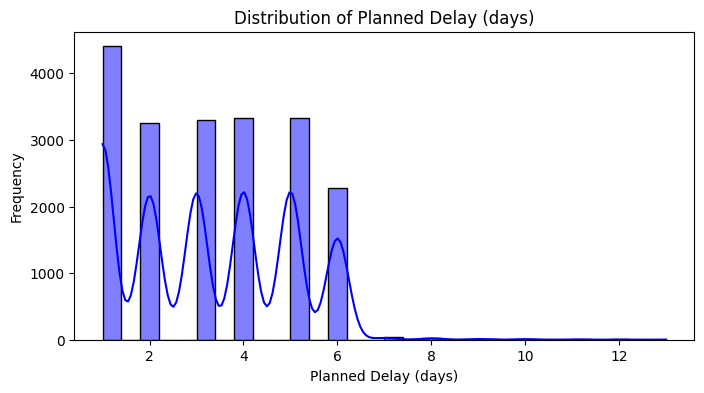

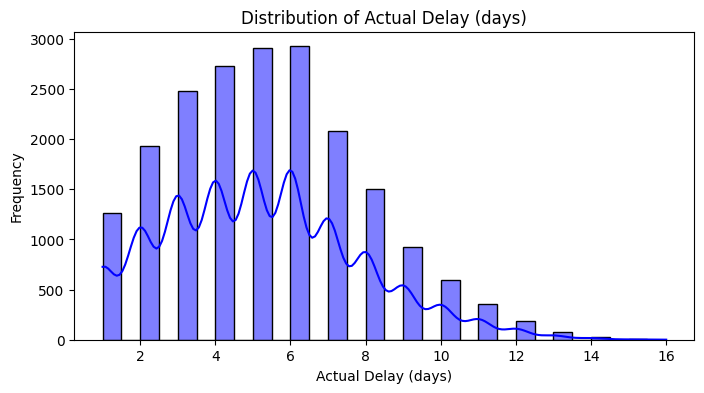

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


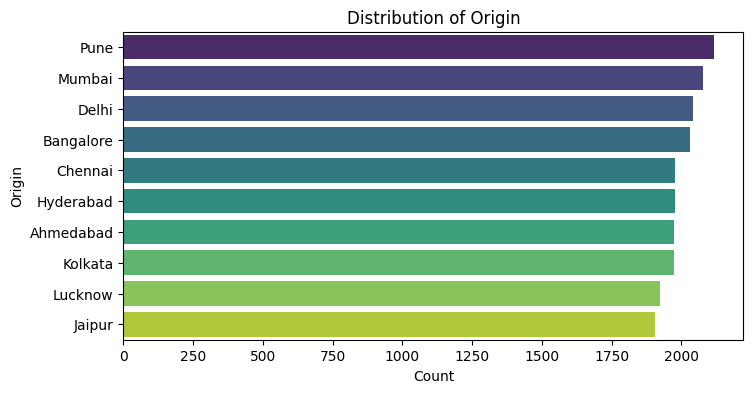

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


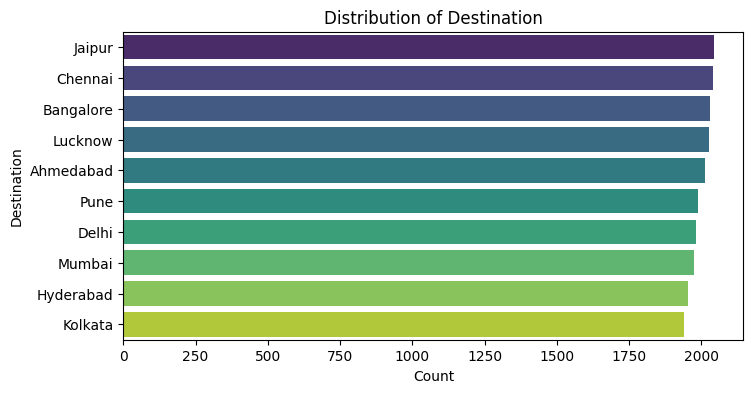

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


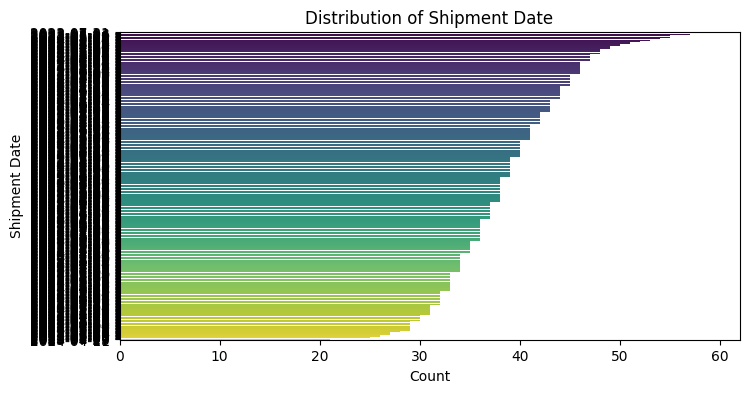

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


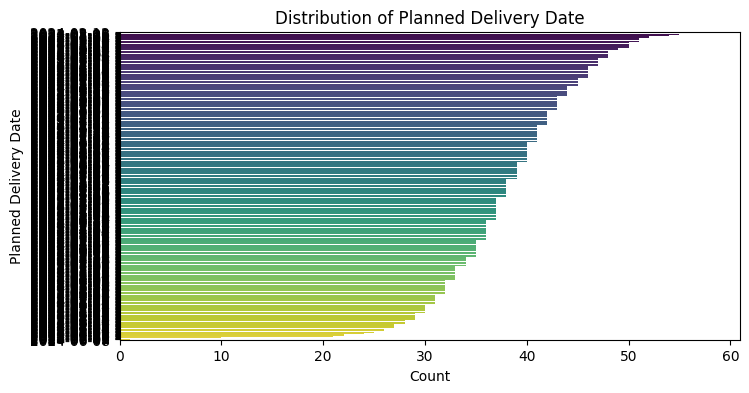

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


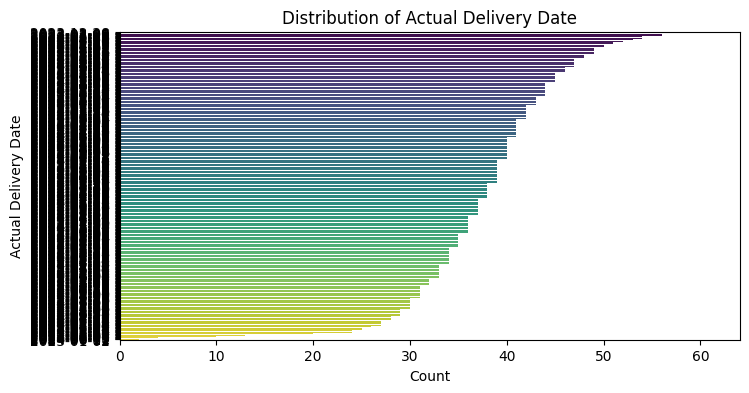

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


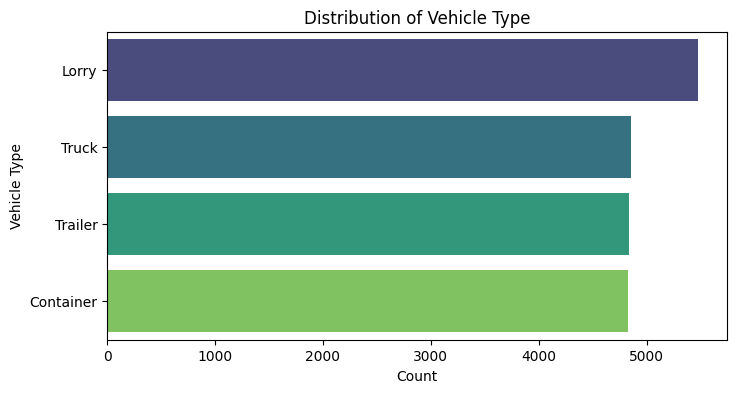

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


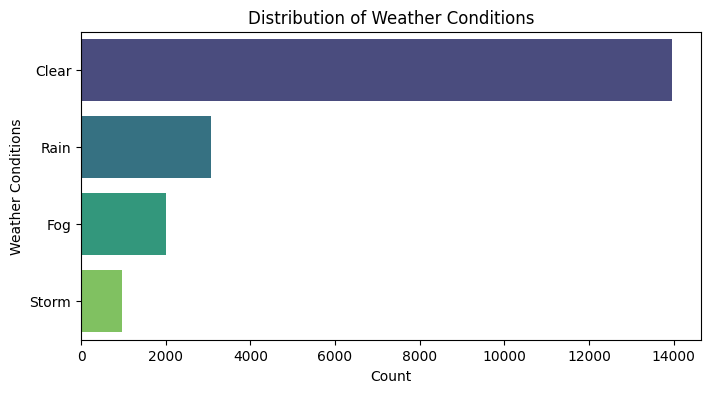

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


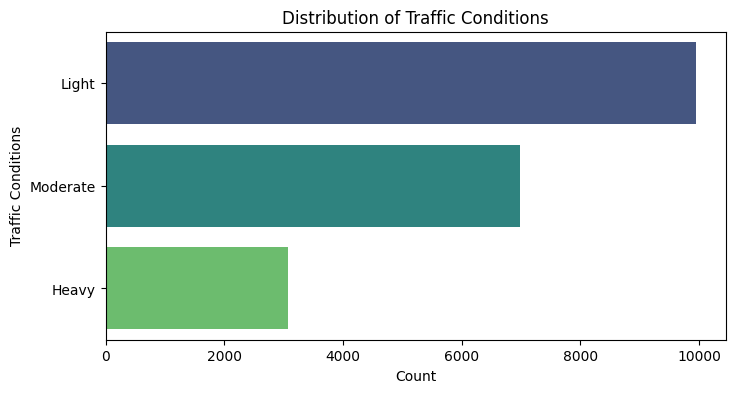

<ipython-input-15-d862f955fbd4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y=col, order=df[col].value_counts().index, palette='viridis')


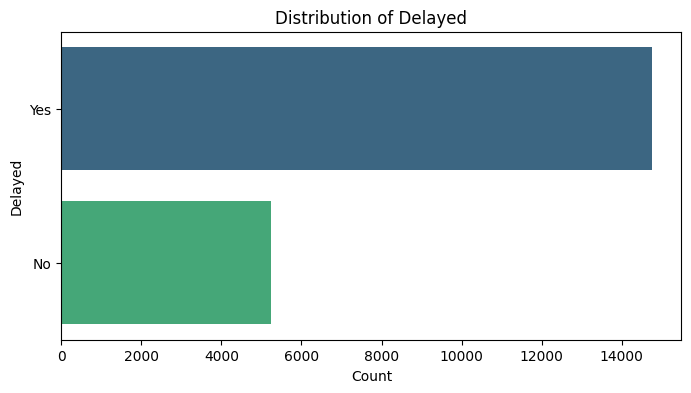

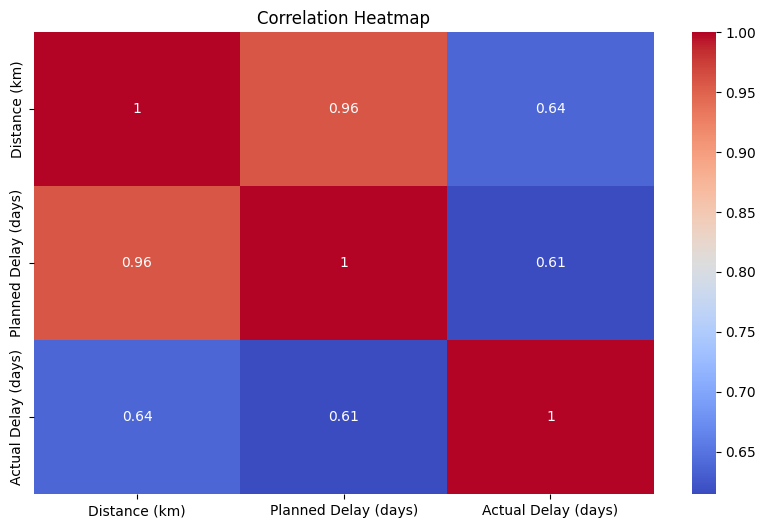

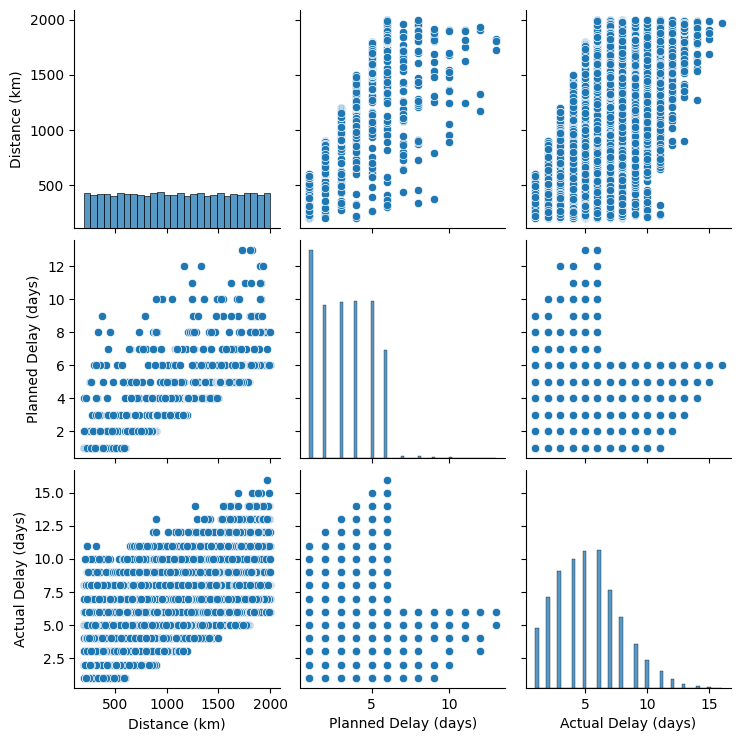

<ipython-input-16-a377a41ce997>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Delayed', data=df, palette='coolwarm')


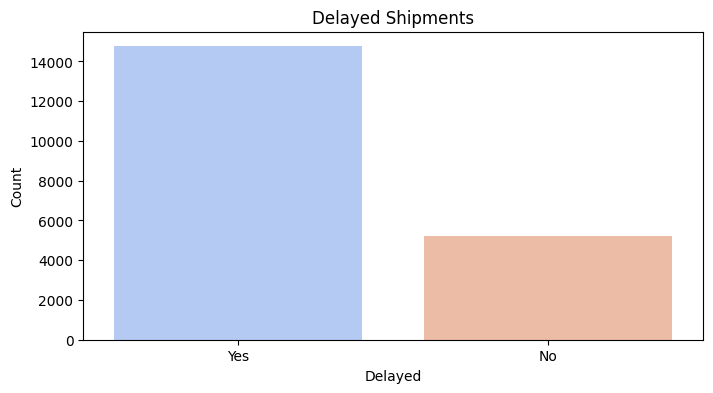

In [ ]:
perform_eda(df)

### Data Cleaning

In [ ]:
def clean_data(df):

    print("Handling missing data...")
    for col in df.columns:
        if df[col].dtype in [np.float64, np.int64]:
            imputer = SimpleImputer(strategy='mean')
            df[col] = imputer.fit_transform(df[[col]])
        elif df[col].dtype == object:
            df[col] = df[col].fillna('Unknown')


    print("Fixing data types...")
    date_cols = ['Shipment Date', 'Planned Delivery Date', 'Actual Delivery Date']
    for col in date_cols:
        if col in df.columns:
            df[col] = pd.to_datetime(df[col], errors='coerce')

    return df

### Feature Engineering

In [ ]:
def feature_engineering(df):
    print("Creating new features...")
    if 'Planned Delay (days)' in df.columns and 'Actual Delay (days)' in df.columns:
        df['Delay Ratio'] = df['Actual Delay (days)'] / df['Planned Delay (days)']

    if 'Weather Conditions' in df.columns:
        df['Severe Weather'] = df['Weather Conditions'].apply(lambda x: 1 if x in ['Storm', 'Snow', 'Heavy Rain'] else 0)

    if 'Shipment Date' in df.columns:
        df['Shipment Day'] = df['Shipment Date'].dt.day
        df['Shipment Month'] = df['Shipment Date'].dt.month
        df['Shipment Year'] = df['Shipment Date'].dt.year
        df.drop('Shipment Date', axis=1, inplace=True)

    if 'Planned Delivery Date' in df.columns:
        df['Planned Delivery Day'] = df['Planned Delivery Date'].dt.day
        df['Planned Delivery Month'] = df['Planned Delivery Date'].dt.month
        df['Planned Delivery Year'] = df['Planned Delivery Date'].dt.year
        df.drop('Planned Delivery Date', axis=1, inplace=True)

    if 'Actual Delivery Date' in df.columns:
        df['Actual Delivery Day'] = df['Actual Delivery Date'].dt.day
        df['Actual Delivery Month'] = df['Actual Delivery Date'].dt.month
        df['Actual Delivery Year'] = df['Actual Delivery Date'].dt.year
        df.drop('Actual Delivery Date', axis=1, inplace=True)

    return df

In [ ]:
def post_eda(df):
    df = clean_data(df)
    df = feature_engineering(df)

In [ ]:
post_eda(df)

Handling missing data...
Fixing data types...
Creating new features...


In [ ]:
df.head(5)

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Planned Delay (days),Actual Delay (days),Delay Ratio,Severe Weather,Shipment Day,Shipment Month,Shipment Year,Planned Delivery Day,Planned Delivery Month,Planned Delivery Year,Actual Delivery Day,Actual Delivery Month,Actual Delivery Year
0,Jaipur,Mumbai,Trailer,1603.0,Rain,Light,Yes,5.0,6.0,1.2,0,26,4,2023,1,5,2023,2,5,2023
1,Bangalore,Delhi,Trailer,1237.0,Storm,Moderate,Yes,4.0,8.0,2.0,1,9,2,2023,13,2,2023,17,2,2023
2,Mumbai,Chennai,Truck,1863.0,Clear,Light,No,6.0,6.0,1.0,0,19,9,2023,25,9,2023,25,9,2023
3,Hyderabad,Ahmedabad,Container,1374.0,Clear,Light,No,4.0,4.0,1.0,0,1,4,2023,5,4,2023,5,4,2023
4,Chennai,Kolkata,Container,676.0,Clear,Heavy,Yes,2.0,4.0,2.0,0,24,11,2023,26,11,2023,28,11,2023


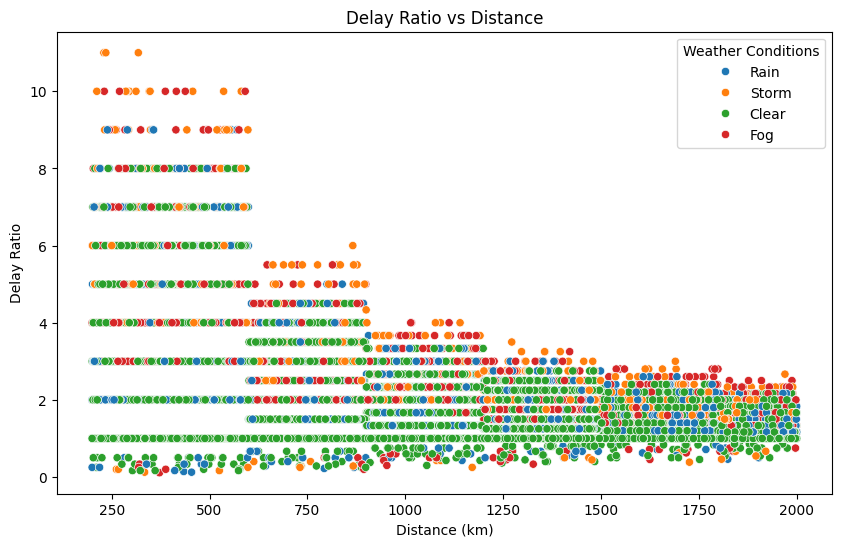

In [ ]:
def relationship_analysis(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Distance (km)', y='Delay Ratio', hue='Weather Conditions')
    plt.title('Delay Ratio vs Distance')
    plt.show()
relationship_analysis(df)

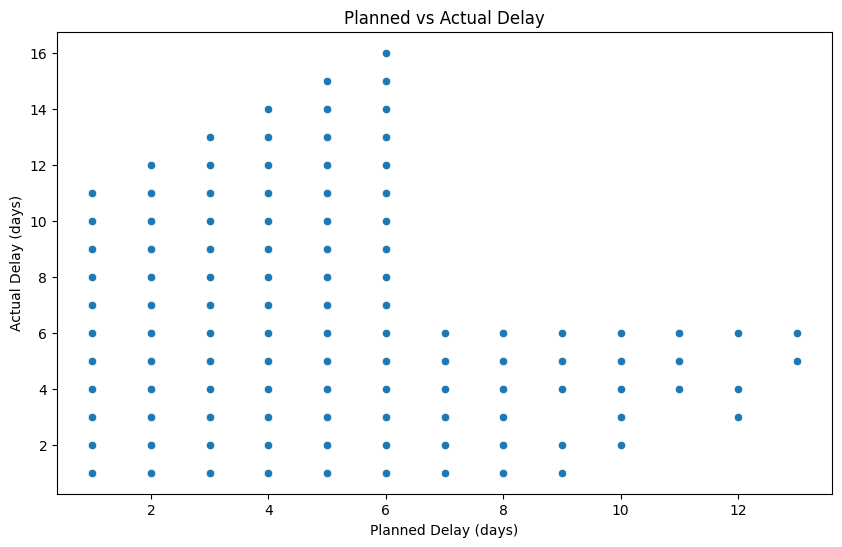

In [ ]:
def delay_analysis(df):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Planned Delay (days)', y='Actual Delay (days)')
    plt.title('Planned vs Actual Delay')
    plt.show()
delay_analysis(df)

In [ ]:
df.head()

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Planned Delay (days),Actual Delay (days),Delay Ratio,Severe Weather,Shipment Day,Shipment Month,Shipment Year,Planned Delivery Day,Planned Delivery Month,Planned Delivery Year,Actual Delivery Day,Actual Delivery Month,Actual Delivery Year
0,Jaipur,Mumbai,Trailer,1603.0,Rain,Light,Yes,5.0,6.0,1.2,0,26,4,2023,1,5,2023,2,5,2023
1,Bangalore,Delhi,Trailer,1237.0,Storm,Moderate,Yes,4.0,8.0,2.0,1,9,2,2023,13,2,2023,17,2,2023
2,Mumbai,Chennai,Truck,1863.0,Clear,Light,No,6.0,6.0,1.0,0,19,9,2023,25,9,2023,25,9,2023
3,Hyderabad,Ahmedabad,Container,1374.0,Clear,Light,No,4.0,4.0,1.0,0,1,4,2023,5,4,2023,5,4,2023
4,Chennai,Kolkata,Container,676.0,Clear,Heavy,Yes,2.0,4.0,2.0,0,24,11,2023,26,11,2023,28,11,2023


### I am just considering not to remove column 'Distance' outliers as distance is variable.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

X = df.drop(columns=['Delayed'])
y = df['Delayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
label_encoders = {}

categorical_columns = ['Origin', 'Destination', 'Vehicle Type', 'Weather Conditions', 'Traffic Conditions']

for col in categorical_columns:
    if col in X_train.columns:
        le = LabelEncoder()
        X_train[col] = le.fit_transform(X_train[col])
        X_test[col] = le.transform(X_test[col])
        label_encoders[col] = le

joblib.dump(label_encoders, 'label_encoders.pkl')

['label_encoders.pkl']

In [ ]:
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


In [ ]:
X_train

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Planned Delay (days),Actual Delay (days),Delay Ratio,Severe Weather,Shipment Day,Shipment Month,Shipment Year,Planned Delivery Day,Planned Delivery Month,Planned Delivery Year,Actual Delivery Day,Actual Delivery Month,Actual Delivery Year
5894,4,6,2,1414.0,1,2,4.0,9.0,2.250000,0,19,9,2023,23,9,2023,28,9,2023
3728,9,7,2,1261.0,1,2,4.0,10.0,2.500000,0,2,5,2024,6,5,2024,12,5,2024
8958,1,6,0,1555.0,2,2,5.0,11.0,2.200000,0,11,9,2023,16,9,2023,22,9,2023
7671,7,4,1,467.0,0,1,1.0,1.0,1.000000,0,25,3,2024,26,3,2024,26,3,2024
5999,9,3,3,1195.0,0,1,3.0,3.0,1.000000,0,30,11,2023,3,12,2023,3,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7,5,1,670.0,0,2,2.0,3.0,1.500000,0,31,7,2023,2,8,2023,3,8,2023
11964,0,7,3,1899.0,0,1,6.0,6.0,1.000000,0,7,1,2023,13,1,2023,13,1,2023
5390,4,6,1,1183.0,0,1,3.0,7.0,2.333333,0,19,3,2024,22,3,2024,26,3,2024
860,8,4,3,367.0,0,1,1.0,3.0,3.000000,0,7,12,2023,8,12,2023,10,12,2023


In [ ]:
y_train

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix


classification_models = [
    ('Logistic Regression', LogisticRegression(max_iter=10000)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Random Forest Classifier', RandomForestClassifier()),
    ('Gradient Boosting Classifier', GradientBoostingClassifier()),
    ('Support Vector Classifier', SVC(probability=True)),
    ('K-Nearest Neighbors Classifier', KNeighborsClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('Gaussian Naive Bayes', GaussianNB()),
]

results = []

for name, model in classification_models:
    print(f"Training {name}...")

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)

    results.append((name, accuracy, precision, recall, f1, roc_auc))

    print(f"{name} - Accuracy: {accuracy}, Precision: {precision}, Recall: {recall}, F1: {f1}, ROC AUC: {roc_auc}")

results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC AUC'])


Training Logistic Regression...
Logistic Regression - Accuracy: 0.99575, Precision: 0.998295841854124, Recall: 0.9959197551853112, F1: 0.9971063829787234, ROC AUC: 0.9988075205192198
Training Decision Tree Classifier...
Decision Tree Classifier - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0, ROC AUC: 1.0
Training Random Forest Classifier...
Random Forest Classifier - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0, ROC AUC: 1.0
Training Gradient Boosting Classifier...
Gradient Boosting Classifier - Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1: 1.0, ROC AUC: 1.0
Training Support Vector Classifier...
Support Vector Classifier - Accuracy: 0.73525, Precision: 0.73525, Recall: 1.0, F1: 0.8474283244489267, ROC AUC: 0.9937396432643371
Training K-Nearest Neighbors Classifier...
K-Nearest Neighbors Classifier - Accuracy: 0.74025, Precision: 0.780862374483166, Recall: 0.8990139408364501, F1: 0.8357831515726253, ROC AUC: 0.7202039865545852
Training AdaBoost Classifier...
AdaBoost Cla

In [ ]:
print("\nModel Evaluation Results:")
print(results_df)

best_accuracy_model = results_df.loc[results_df['Accuracy'].idxmax()]
best_precision_model = results_df.loc[results_df['Precision'].idxmax()]
best_recall_model = results_df.loc[results_df['Recall'].idxmax()]
best_f1_model = results_df.loc[results_df['F1-Score'].idxmax()]
best_roc_auc_model = results_df.loc[results_df['ROC AUC'].idxmax()]

print("\nBest Models Based on Metrics:")
print(f"Best Model by Accuracy: {best_accuracy_model}")
print(f"Best Model by Precision: {best_precision_model}")
print(f"Best Model by Recall: {best_recall_model}")
print(f"Best Model by F1-Score: {best_f1_model}")
print(f"Best Model by ROC AUC: {best_roc_auc_model}")


Model Evaluation Results:
                            Model  Accuracy  Precision    Recall  F1-Score  \
0             Logistic Regression   0.99575   0.998296  0.995920  0.997106   
1        Decision Tree Classifier   1.00000   1.000000  1.000000  1.000000   
2        Random Forest Classifier   1.00000   1.000000  1.000000  1.000000   
3    Gradient Boosting Classifier   1.00000   1.000000  1.000000  1.000000   
4       Support Vector Classifier   0.73525   0.735250  1.000000  0.847428   
5  K-Nearest Neighbors Classifier   0.74025   0.780862  0.899014  0.835783   
6             AdaBoost Classifier   1.00000   1.000000  1.000000  1.000000   
7            Gaussian Naive Bayes   1.00000   1.000000  1.000000  1.000000   

    ROC AUC  
0  0.998808  
1  1.000000  
2  1.000000  
3  1.000000  
4  0.993740  
5  0.720204  
6  1.000000  
7  1.000000  

Best Models Based on Metrics:
Best Model by Accuracy: Model        Decision Tree Classifier
Accuracy                          1.0
Precision    

### Choosing the gradient boosting model, it has good score and it is faster

In [ ]:
import joblib

model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")
print(f"ROC AUC Score: {roc_auc}")

joblib.dump(model, 'gradient_boosting_model.pkl')

# joblib.dump(label_encoder, 'label_encoder.pkl')

print("Model, scaler, and label encoder saved successfully.")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
ROC AUC Score: 1.0
Model, scaler, and label encoder saved successfully.


In [ ]:
df

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Delayed,Planned Delay (days),Actual Delay (days),Delay Ratio,Severe Weather,Shipment Day,Shipment Month,Shipment Year,Planned Delivery Day,Planned Delivery Month,Planned Delivery Year,Actual Delivery Day,Actual Delivery Month,Actual Delivery Year
0,Jaipur,Mumbai,Trailer,1603.0,Rain,Light,Yes,5.0,6.0,1.2,0,26,4,2023,1,5,2023,2,5,2023
1,Bangalore,Delhi,Trailer,1237.0,Storm,Moderate,Yes,4.0,8.0,2.0,1,9,2,2023,13,2,2023,17,2,2023
2,Mumbai,Chennai,Truck,1863.0,Clear,Light,No,6.0,6.0,1.0,0,19,9,2023,25,9,2023,25,9,2023
3,Hyderabad,Ahmedabad,Container,1374.0,Clear,Light,No,4.0,4.0,1.0,0,1,4,2023,5,4,2023,5,4,2023
4,Chennai,Kolkata,Container,676.0,Clear,Heavy,Yes,2.0,4.0,2.0,0,24,11,2023,26,11,2023,28,11,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Chennai,Bangalore,Truck,564.0,Fog,Moderate,Yes,1.0,4.0,4.0,0,22,6,2023,23,6,2023,26,6,2023
19996,Hyderabad,Jaipur,Truck,305.0,Storm,Moderate,Yes,1.0,5.0,5.0,1,2,3,2023,3,3,2023,7,3,2023
19997,Hyderabad,Mumbai,Trailer,1028.0,Rain,Moderate,Yes,3.0,9.0,3.0,0,24,5,2023,27,5,2023,2,6,2023
19998,Ahmedabad,Chennai,Lorry,905.0,Fog,Moderate,Yes,3.0,6.0,2.0,0,2,5,2023,5,5,2023,8,5,2023


In [ ]:
X_train

,Origin,Destination,Vehicle Type,Distance (km),Weather Conditions,Traffic Conditions,Planned Delay (days),Actual Delay (days),Delay Ratio,Severe Weather,Shipment Day,Shipment Month,Shipment Year,Planned Delivery Day,Planned Delivery Month,Planned Delivery Year,Actual Delivery Day,Actual Delivery Month,Actual Delivery Year
5894,4,6,2,1414.0,1,2,4.0,9.0,2.250000,0,19,9,2023,23,9,2023,28,9,2023
3728,9,7,2,1261.0,1,2,4.0,10.0,2.500000,0,2,5,2024,6,5,2024,12,5,2024
8958,1,6,0,1555.0,2,2,5.0,11.0,2.200000,0,11,9,2023,16,9,2023,22,9,2023
7671,7,4,1,467.0,0,1,1.0,1.0,1.000000,0,25,3,2024,26,3,2024,26,3,2024
5999,9,3,3,1195.0,0,1,3.0,3.0,1.000000,0,30,11,2023,3,12,2023,3,12,2023
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11284,7,5,1,670.0,0,2,2.0,3.0,1.500000,0,31,7,2023,2,8,2023,3,8,2023
11964,0,7,3,1899.0,0,1,6.0,6.0,1.000000,0,7,1,2023,13,1,2023,13,1,2023
5390,4,6,1,1183.0,0,1,3.0,7.0,2.333333,0,19,3,2024,22,3,2024,26,3,2024
860,8,4,3,367.0,0,1,1.0,3.0,3.000000,0,7,12,2023,8,12,2023,10,12,2023


In [ ]:
import joblib
import pandas as pd

model = joblib.load("/content/gradient_boosting_model.pkl")
label_encoders = joblib.load("/content/label_encoders.pkl")

data = {
    'Origin': [4, 9],
    'Destination': [6, 7],
    'Vehicle Type': [2, 2],
    'Distance (km)': [1414.0, 1261.0],
    'Weather Conditions': [1, 1],
    'Traffic Conditions': [2, 2],
    'Planned Delay (days)': [4.0, 4.0],
    'Actual Delay (days)': [9.0, 10.0],
    'Delay Ratio': [2.25, 2.5],
    'Severe Weather': [0, 0],
    'Shipment Day': [19, 2],
    'Shipment Month': [9, 5],
    'Shipment Year': [2023, 2024],
    'Planned Delivery Day': [23, 6],
    'Planned Delivery Month': [9, 5],
    'Planned Delivery Year': [2023, 2024],
    'Actual Delivery Day': [28, 12],
    'Actual Delivery Month': [9, 5],
    'Actual Delivery Year': [2023, 2024],
}

input_df = pd.DataFrame(data)

columns_order = [
    'Origin', 'Destination', 'Vehicle Type', 'Distance (km)', 'Weather Conditions',
    'Traffic Conditions', 'Planned Delay (days)', 'Actual Delay (days)',
    'Delay Ratio', 'Severe Weather', 'Shipment Day', 'Shipment Month',
    'Shipment Year', 'Planned Delivery Day', 'Planned Delivery Month',
    'Planned Delivery Year', 'Actual Delivery Day', 'Actual Delivery Month',
    'Actual Delivery Year'
]
input_df = input_df[columns_order]

predictions = model.predict(input_df)

for i, prediction in enumerate(predictions, start=1):
    print(f"Prediction for Row {i}: {'Delayed' if prediction == 1 else 'Not Delayed'}")


Prediction for Row 1: Delayed
Prediction for Row 2: Delayed
